# Banglore House Price Prediction

In [1]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,3)
plt.rcParams['figure.dpi']=300
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#READ THE DATA
df=pd.read_csv(r"C:\Users\darsh\OneDrive\Desktop\BengluruProject\Bengaluru_House_Data.csv")

In [3]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
df.shape

(13320, 9)

In [5]:
#CHECKING THE DATATYPES OF COLUMN
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
#SUMMARY OF DATA
df.describe(include='object')

area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   

       total_sqft  
count       13320  
unique       2117  
top          1200  
freq          843

In [7]:
#EXAMINE THE DIFFERENT CATEGORIES IN AREA_TYPE COLUMN

df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Drop features that are not required to build our model. We see that only location, size, total_sqft, bath and price (y variable to be predicted) are important. So we will remove the other columns like: area_type','society','balcony','availability

In [8]:
df1=df.drop(['area_type','balcony','society','availability'],axis='columns')

In [9]:
df1.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

# DATA PREPROCESSING

In [10]:
#CHECKING AND TREATING MISSING VALUES

df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
len(df1)

13320

In [12]:
for i in df1.isna().sum():
    print(f"{(i/len(df1))*100}%")

0.0075075075075075074%
0.12012012012012012%
0.0%
0.5480480480480481%
0.0%


In [13]:
df2=df1.dropna()

In [14]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
print(f"values_counts are:{df2['size'].value_counts()}")
print(df2['size'].nunique())

values_counts are:2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64
31


Here above we can see 7 bedroom and 7BHK means the same,sp performing feature engineering

In [16]:
#CREATED NEW FEATURE BHK 
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df2.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [18]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df2[df2.bhk==43]

location        size total_sqft  bath  price  bhk
4684  Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [20]:
#INTERPRETATION : SEEMS TO BE SOMETHING WRONG AS IN TOTAL_SQFT i.e 2400 WE CAN'T HAVE 43 ROOMS

In [21]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
#'1133 - 1384' we got a range ,now converting it to single number using average

In [23]:
#CREATE A FUCNTION THAT WILL CONVERT X TO FLOAT
def is_float(x):
    try:
        float(x)
        return True
    except:                  #If conversion fails (e.g., x is a range like "2100 - 2850" or a string), it returns False.
        return False

In [24]:
df2[~df2['total_sqft'].apply(is_float)].head(15)

location       size      total_sqft  bath    price  bhk
30               Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122                 Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137     8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165               Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188               KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410                Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549            Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648                Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661              Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672           Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4
772  Banashankari Stage VI      2 BHK     1160 - 1195   2.0   59.935    2
775           Basavanagara      1 BHK   1000Sq. Meter   2.0   93.000    1
850      Bannerghatta Road      2 BHK     1115 - 1130   2.0   58.935    2
872      Singapura Village      2 BHK   1100Sq. Yards   2.0   45.000    2
886             Chandapura      1 BHK       520 - 645   1.0   15.135    1

In [25]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [28]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [29]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']    #price is multiplied to 100000 as it is in lakh of rupees

In [31]:
df4.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [32]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [33]:
df4['location'].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [34]:
len(df4['location'].unique())

1304

In [35]:
#INTERPRETATION: their's 1305 unique location present,applying one hot encoding will not be useful as it will generate 1305 columns which leads 
#DIMENSIONALITY CURSE

# DIMENSIONALITY REDUCTION

In [36]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [37]:
location_stats.values.sum()

13246

In [38]:
len(location_stats[location_stats<=10])

1052

In [39]:
location_stats_less_10=location_stats[location_stats<=10]
location_stats_less_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [40]:
# Set display options to show all rows in the output
pd.set_option('display.max_rows', None)

# Now display the entire output
location_stats_less_10

Naganathapura                                         10
Sadashiva Nagar                                       10
Nagappa Reddy Layout                                  10
BTM 1st Stage                                         10
Sector 1 HSR Layout                                   10
Basapura                                              10
Ganga Nagar                                           10
Dairy Circle                                          10
Kalkere                                               10
1st Block Koramangala                                 10
Dodsworth Layout                                      10
Nagadevanahalli                                       10
Gunjur Palya                                          10
2nd Phase JP Nagar                                     9
KUDLU MAIN ROAD                                        9
4th Block Koramangala                                  9
Vignana Nagar                                          9
Ejipura                        

In [41]:
#Considering Any location having less than 10 data points as "other" category location.

In [42]:
len(df4['location'].unique())    #got 1293 unique location

1293

In [43]:
df4['location']=df4['location'].apply(lambda x : 'other' if x in location_stats_less_10 else x)

In [44]:
len(df4['location'].unique()) 

242

# OUTLIERS DETECTION AND TREATMENT 

In [45]:
#USING DOMAIN KNOWLEDGE

In [46]:
#We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [47]:
df4[df4['total_sqft']/df4['bhk']<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [48]:
#HERE WE CAN SEE CLEAR ERROR DATAPOINT LIKE 8 BHK WITH 600 SQFT IS UNSUAL

In [49]:
df4.shape

(13246, 7)

In [50]:
#CREATING A NEW DATAFRAME THAT WILL STORE VALUES OF BHK THAT ARE NOT LESS THAN 300sqft

df5 = df4[~(df4.total_sqft/df4.bhk<300)]


In [51]:
df5.shape

(12502, 7)

In [52]:
 df5.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  12456.000000  12502.000000  12502.000000  12502.000000    12456.000000
mean    1590.189927      2.564790    111.311915      2.650696     6308.502826
std     1260.404795      1.084946    152.089966      0.981698     4168.127339
min      300.000000      1.000000      9.000000      1.000000      267.829813
25%     1115.000000      2.000000     49.000000      2.000000     4210.526316
50%     1300.000000      2.000000     70.000000      3.000000     5294.117647
75%     1700.000000      3.000000    115.000000      3.000000     6916.666667
max    52272.000000     16.000000   3600.000000     16.000000   176470.588235

In [53]:
#min price per sqft is 267 rs/sqft whereas max is 176470.588235, this shows a wide variation in prices
#removing those outliers uisng mean and standard deviation

In [54]:
#For each location based on price_per_sqft, as some location might have high prices some may have low prices

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)        #we remove price_per_sqft outliers from df5 and stored it in df6
df6.shape

(10241, 7)

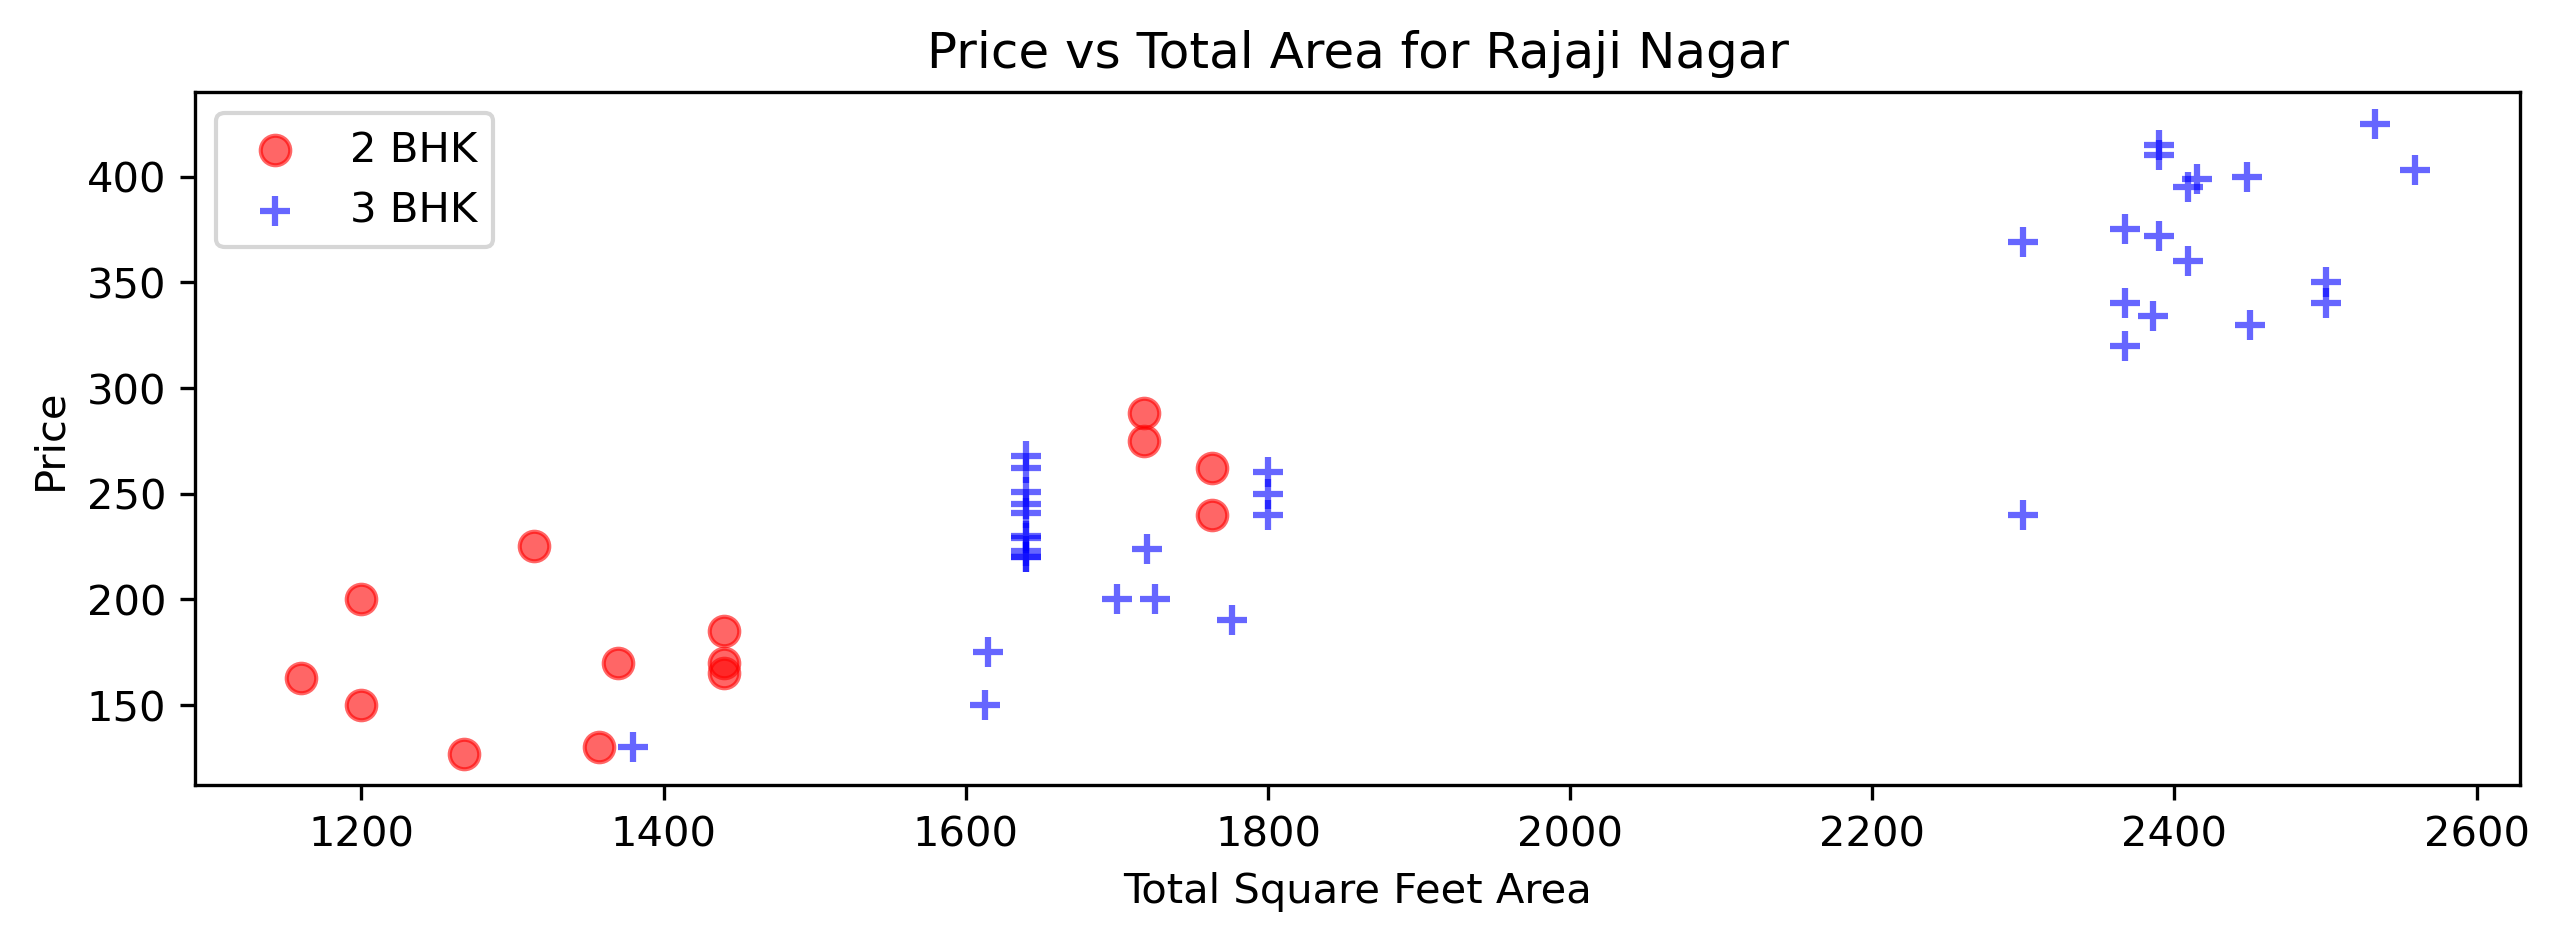

In [55]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    # Filter data for 2 BHK and 3 BHK for the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
   
    # Scatter plot for 2 BHK
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='Red', label='2 BHK', s=50, alpha=0.6)
    
    # Scatter plot for 3 BHK
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='+', color='blue', label='3 BHK', s=50, alpha=0.6)
    
    # Set the labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(f"Price vs Total Area for {location}")
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()


plot_scatter_chart(df6, "Rajaji Nagar")


In [56]:
#HERE WE CAN SEE THE PRICE OF 2BHK IS MORE THAN 3BHK 

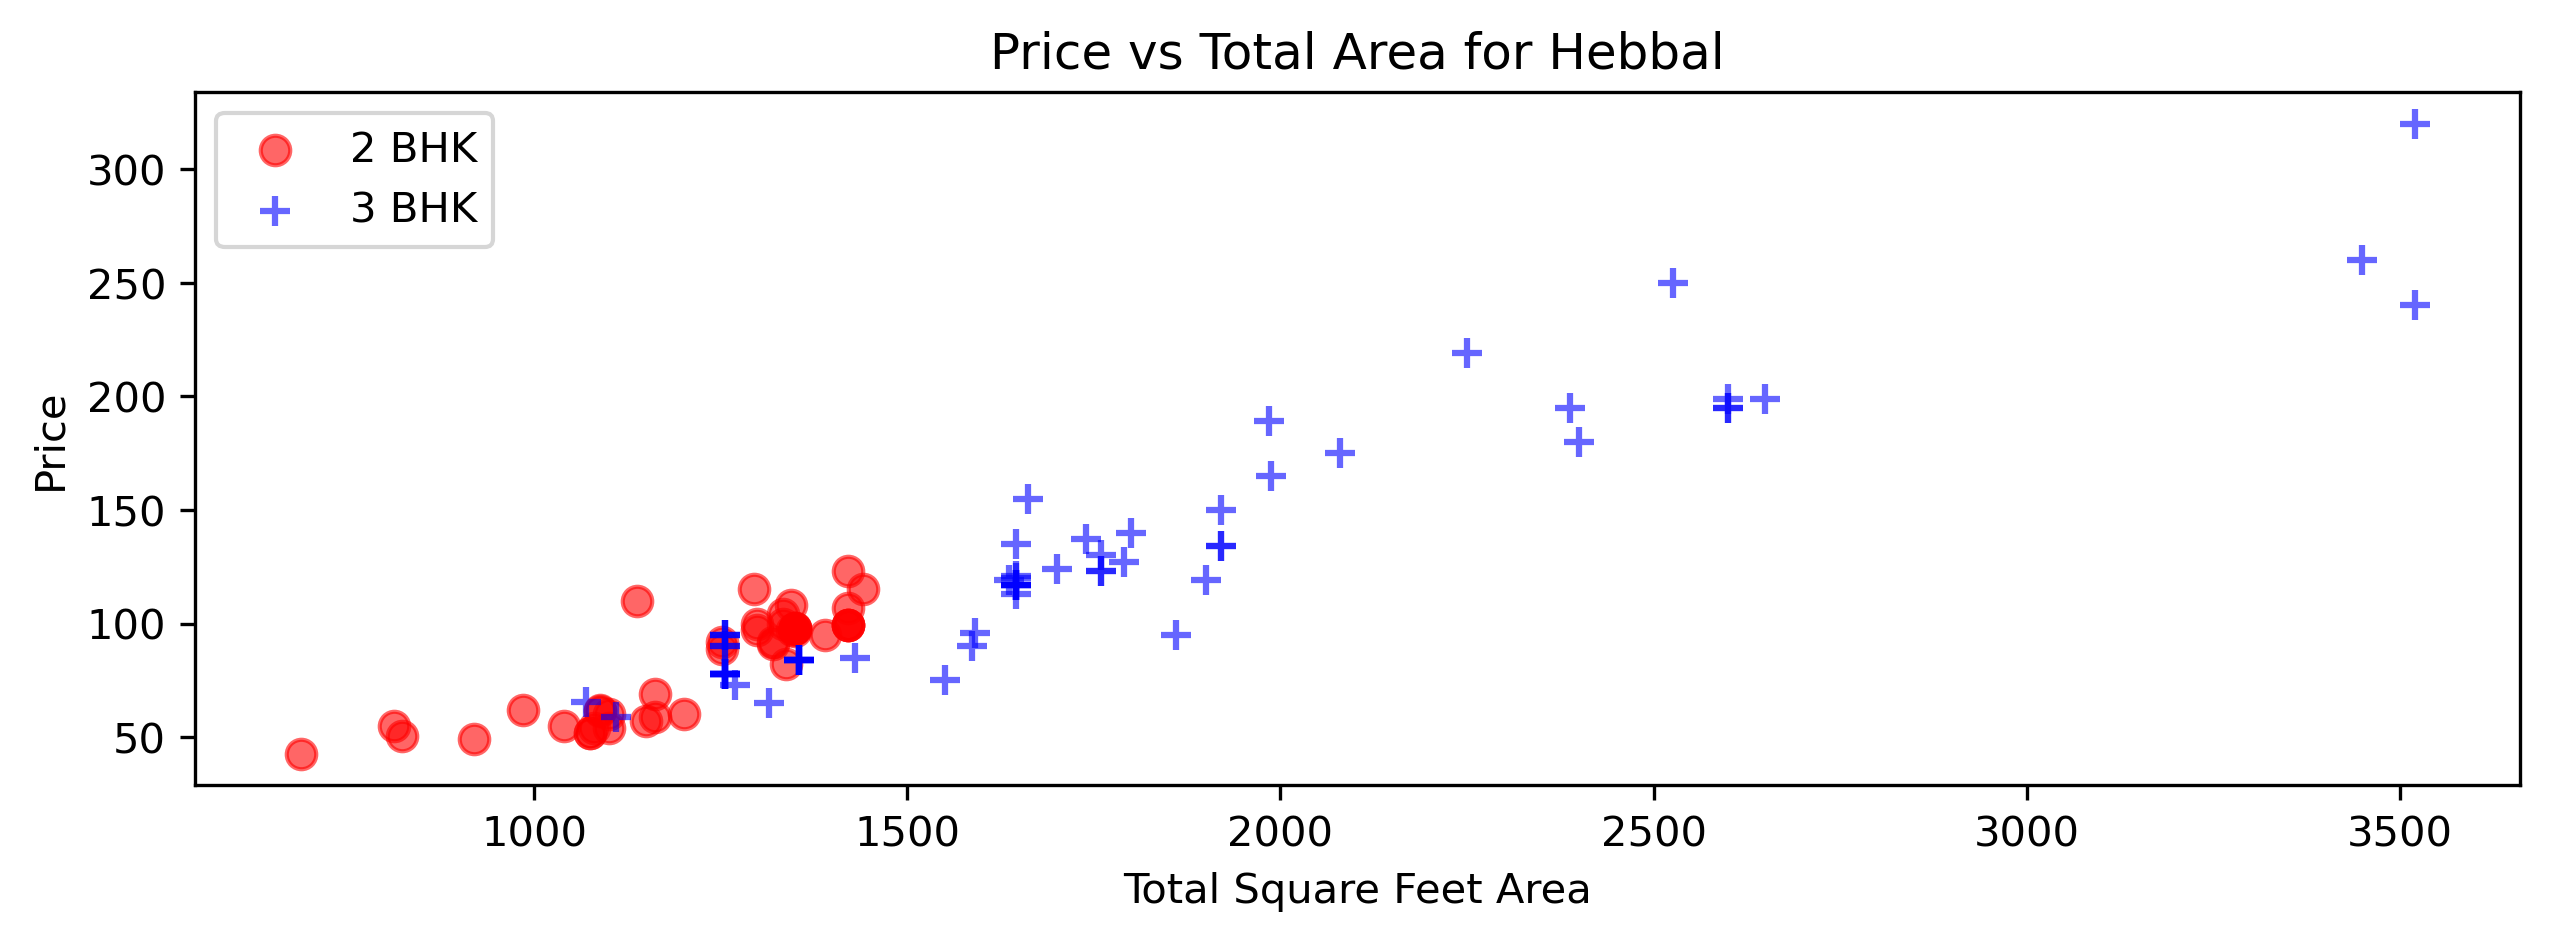

In [57]:
#Some another location
plot_scatter_chart(df6, "Hebbal")


In [58]:
#INTERPRETATION : 2BHK PRICE IS HIGHER THAN 3BHK

In [59]:
#CLEANING UP THOSE ERROR
#Creating a funtion to remove outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):   #looping 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):    
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),   #per bhk
                'std_dev': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)   #excluding those datapoints
                #which lies beyond eg: for 2bhk apt filtering properties value whose price_per_sqft is less than mean of 1bhk 
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

df7.shape

(7329, 7)

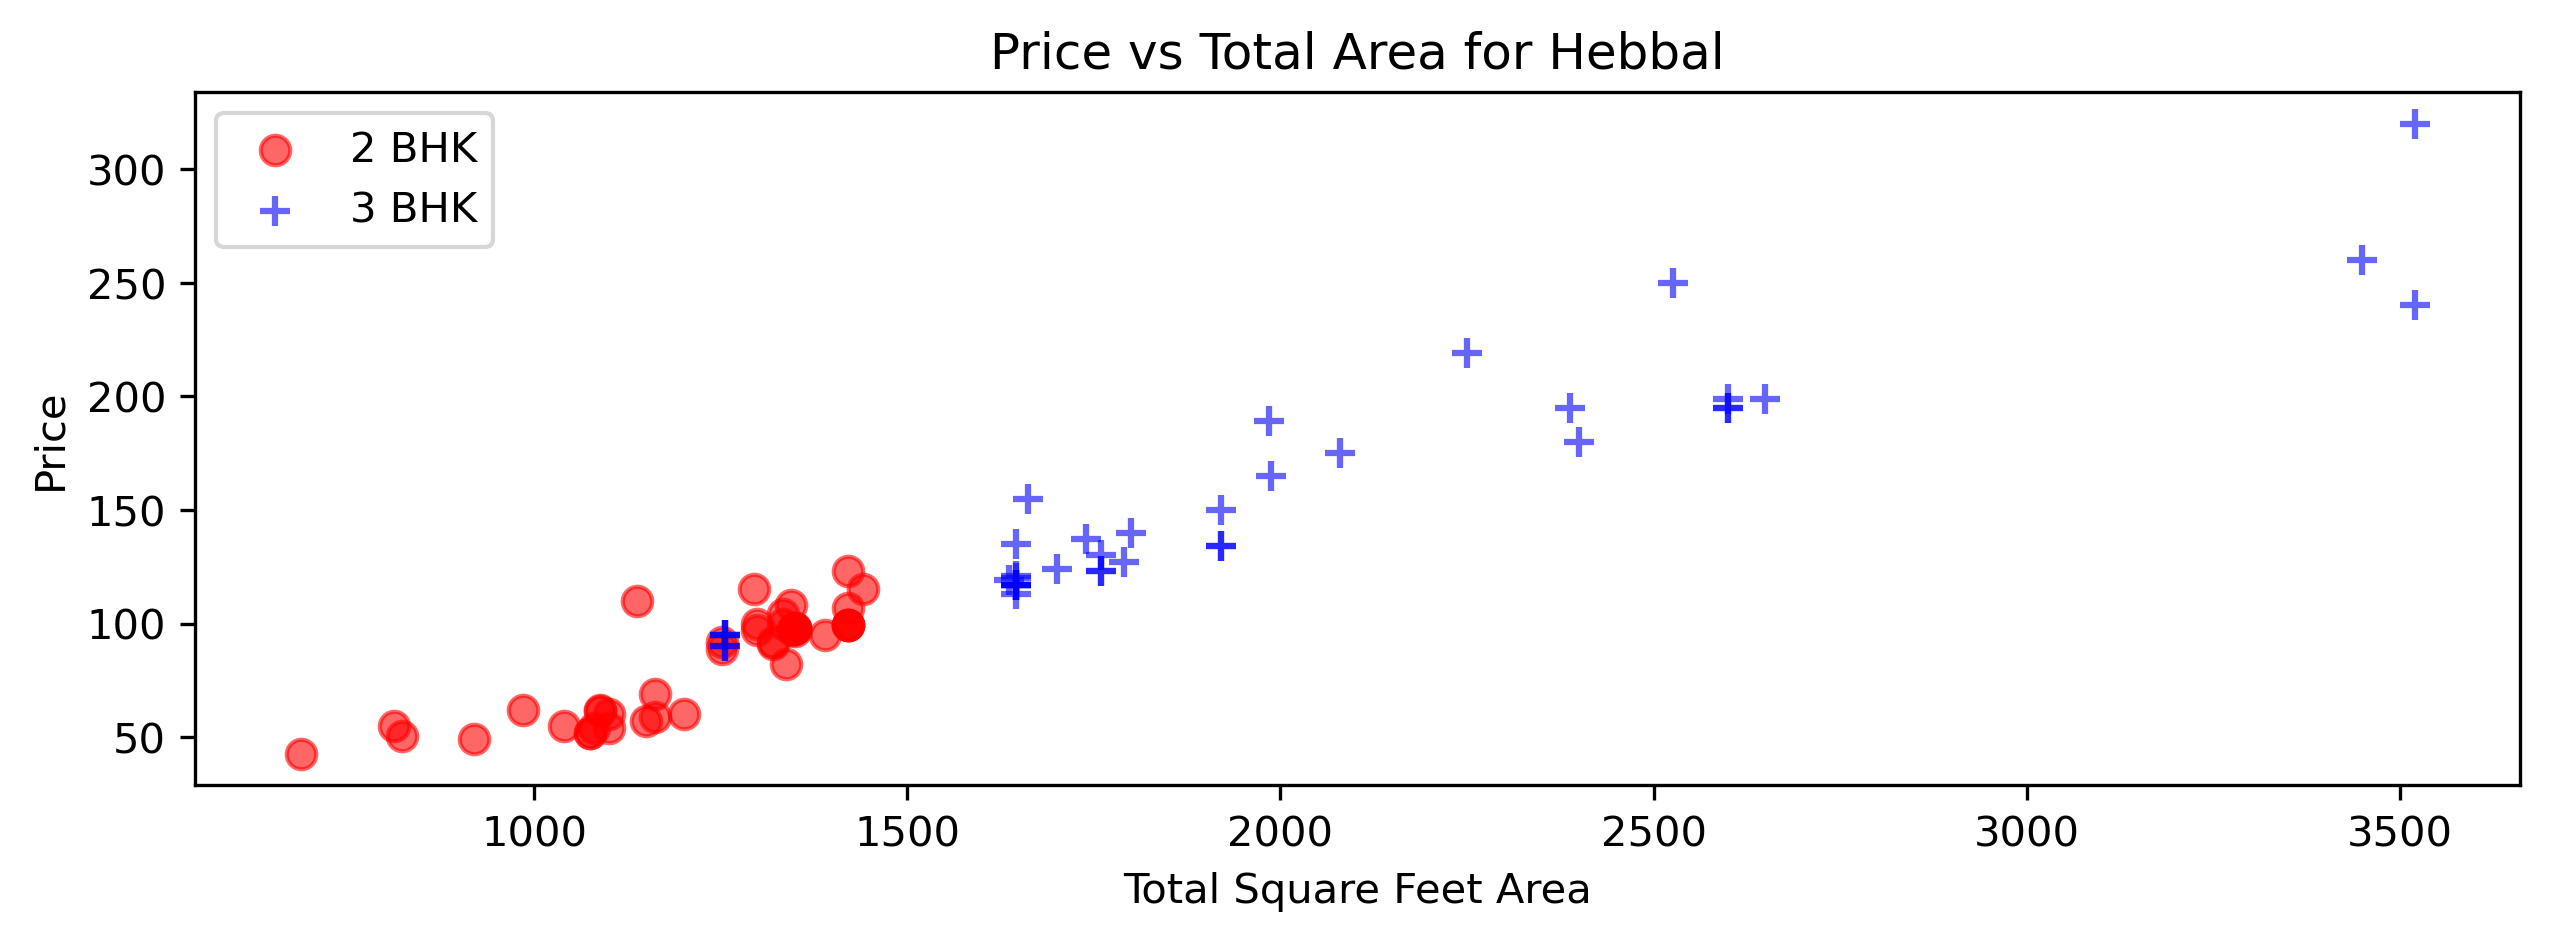

In [60]:
plot_scatter_chart(df7, "Hebbal")

In [61]:
#here we removed those datapoints where eg: 3 bhk apt price is less than 2bhk  with same sqft area,we built  a dictionary of stats per bhk.

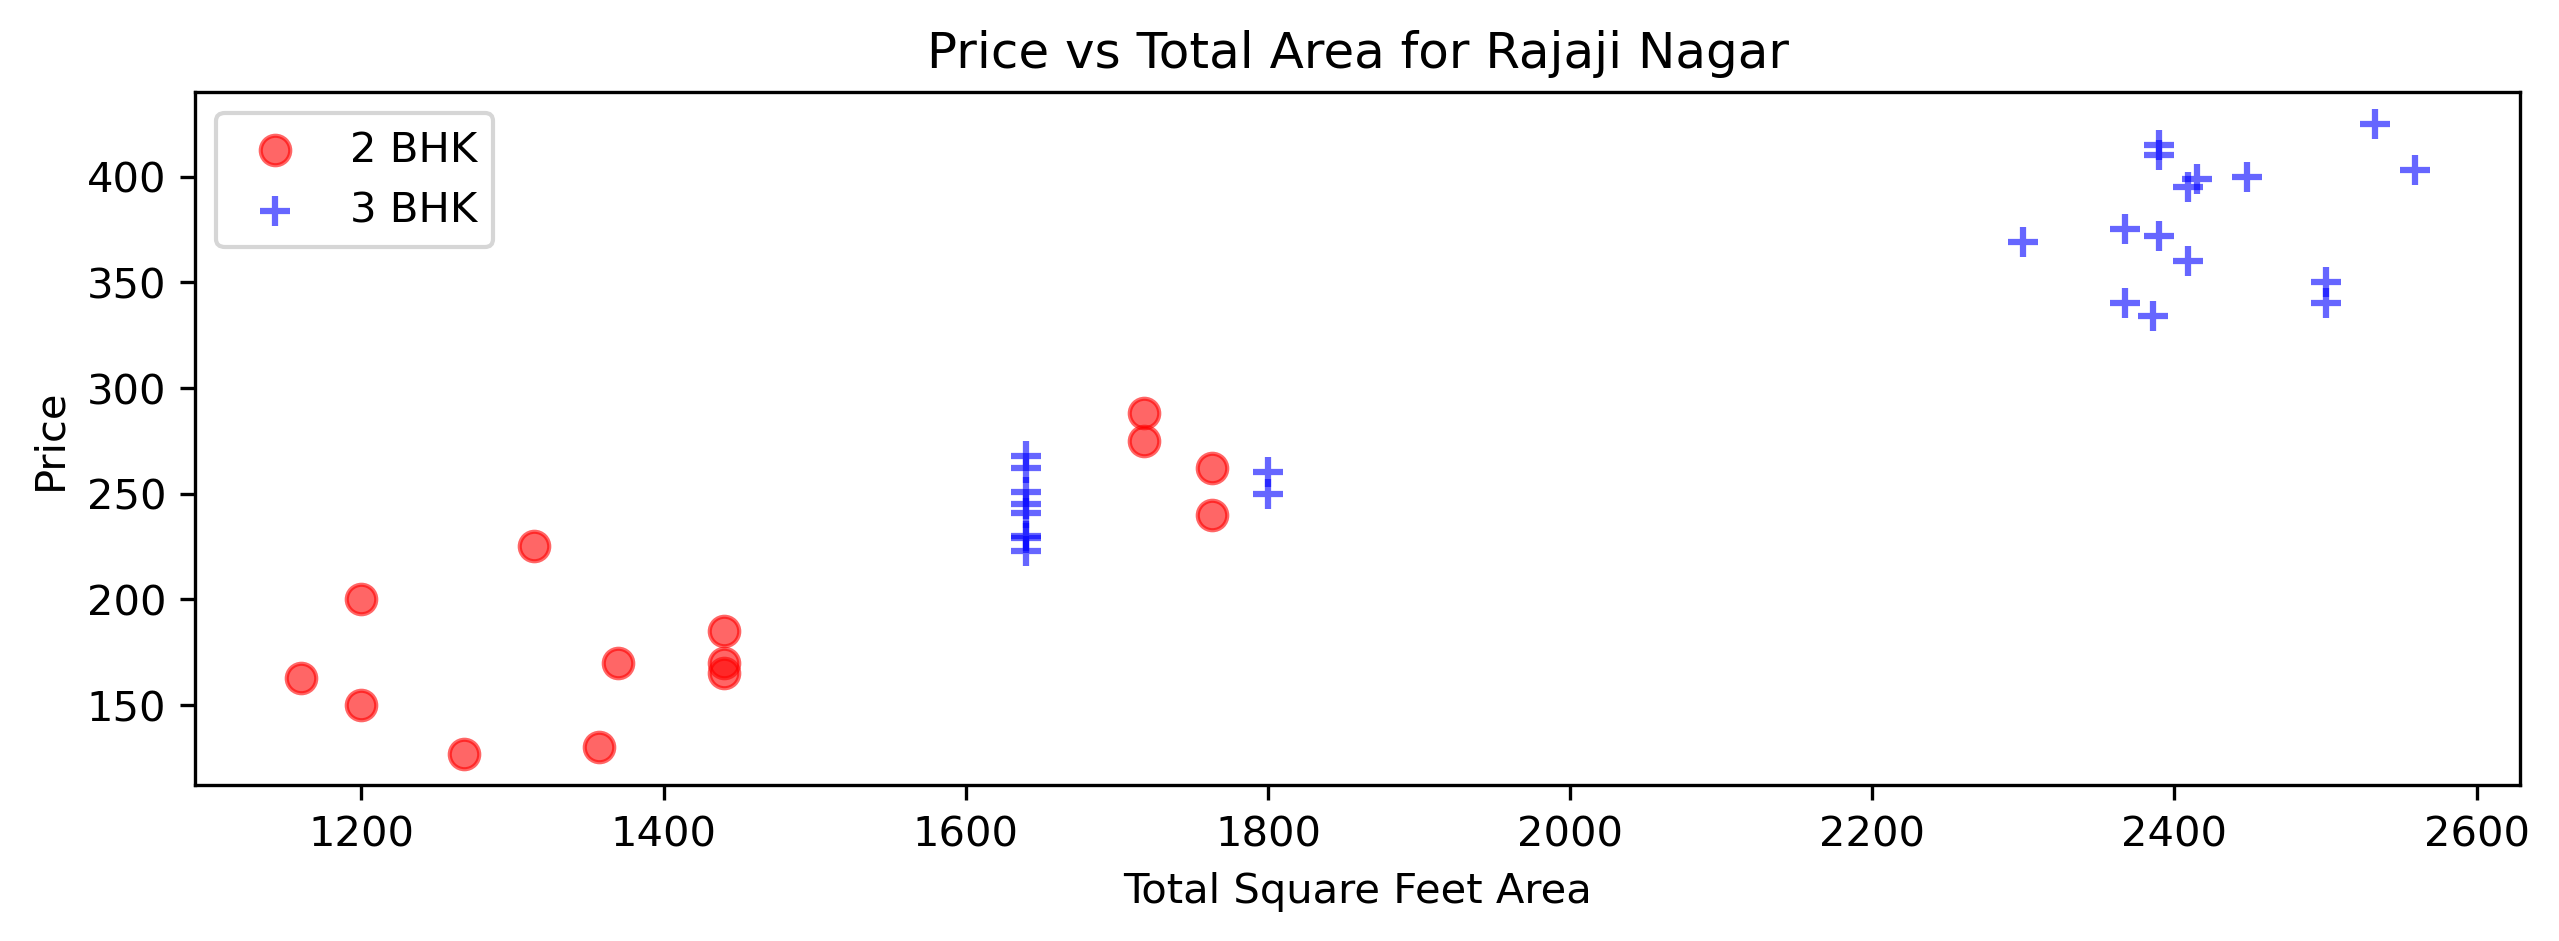

In [62]:
plot_scatter_chart(df7, "Rajaji Nagar")

In [63]:
#Here also(for different location) we removed the datapoints  where eg: 3 bhk apt price is less than 2bhk  with same sqft area,we built  a dictionary of stats per bhk.

Text(0, 0.5, 'Count')

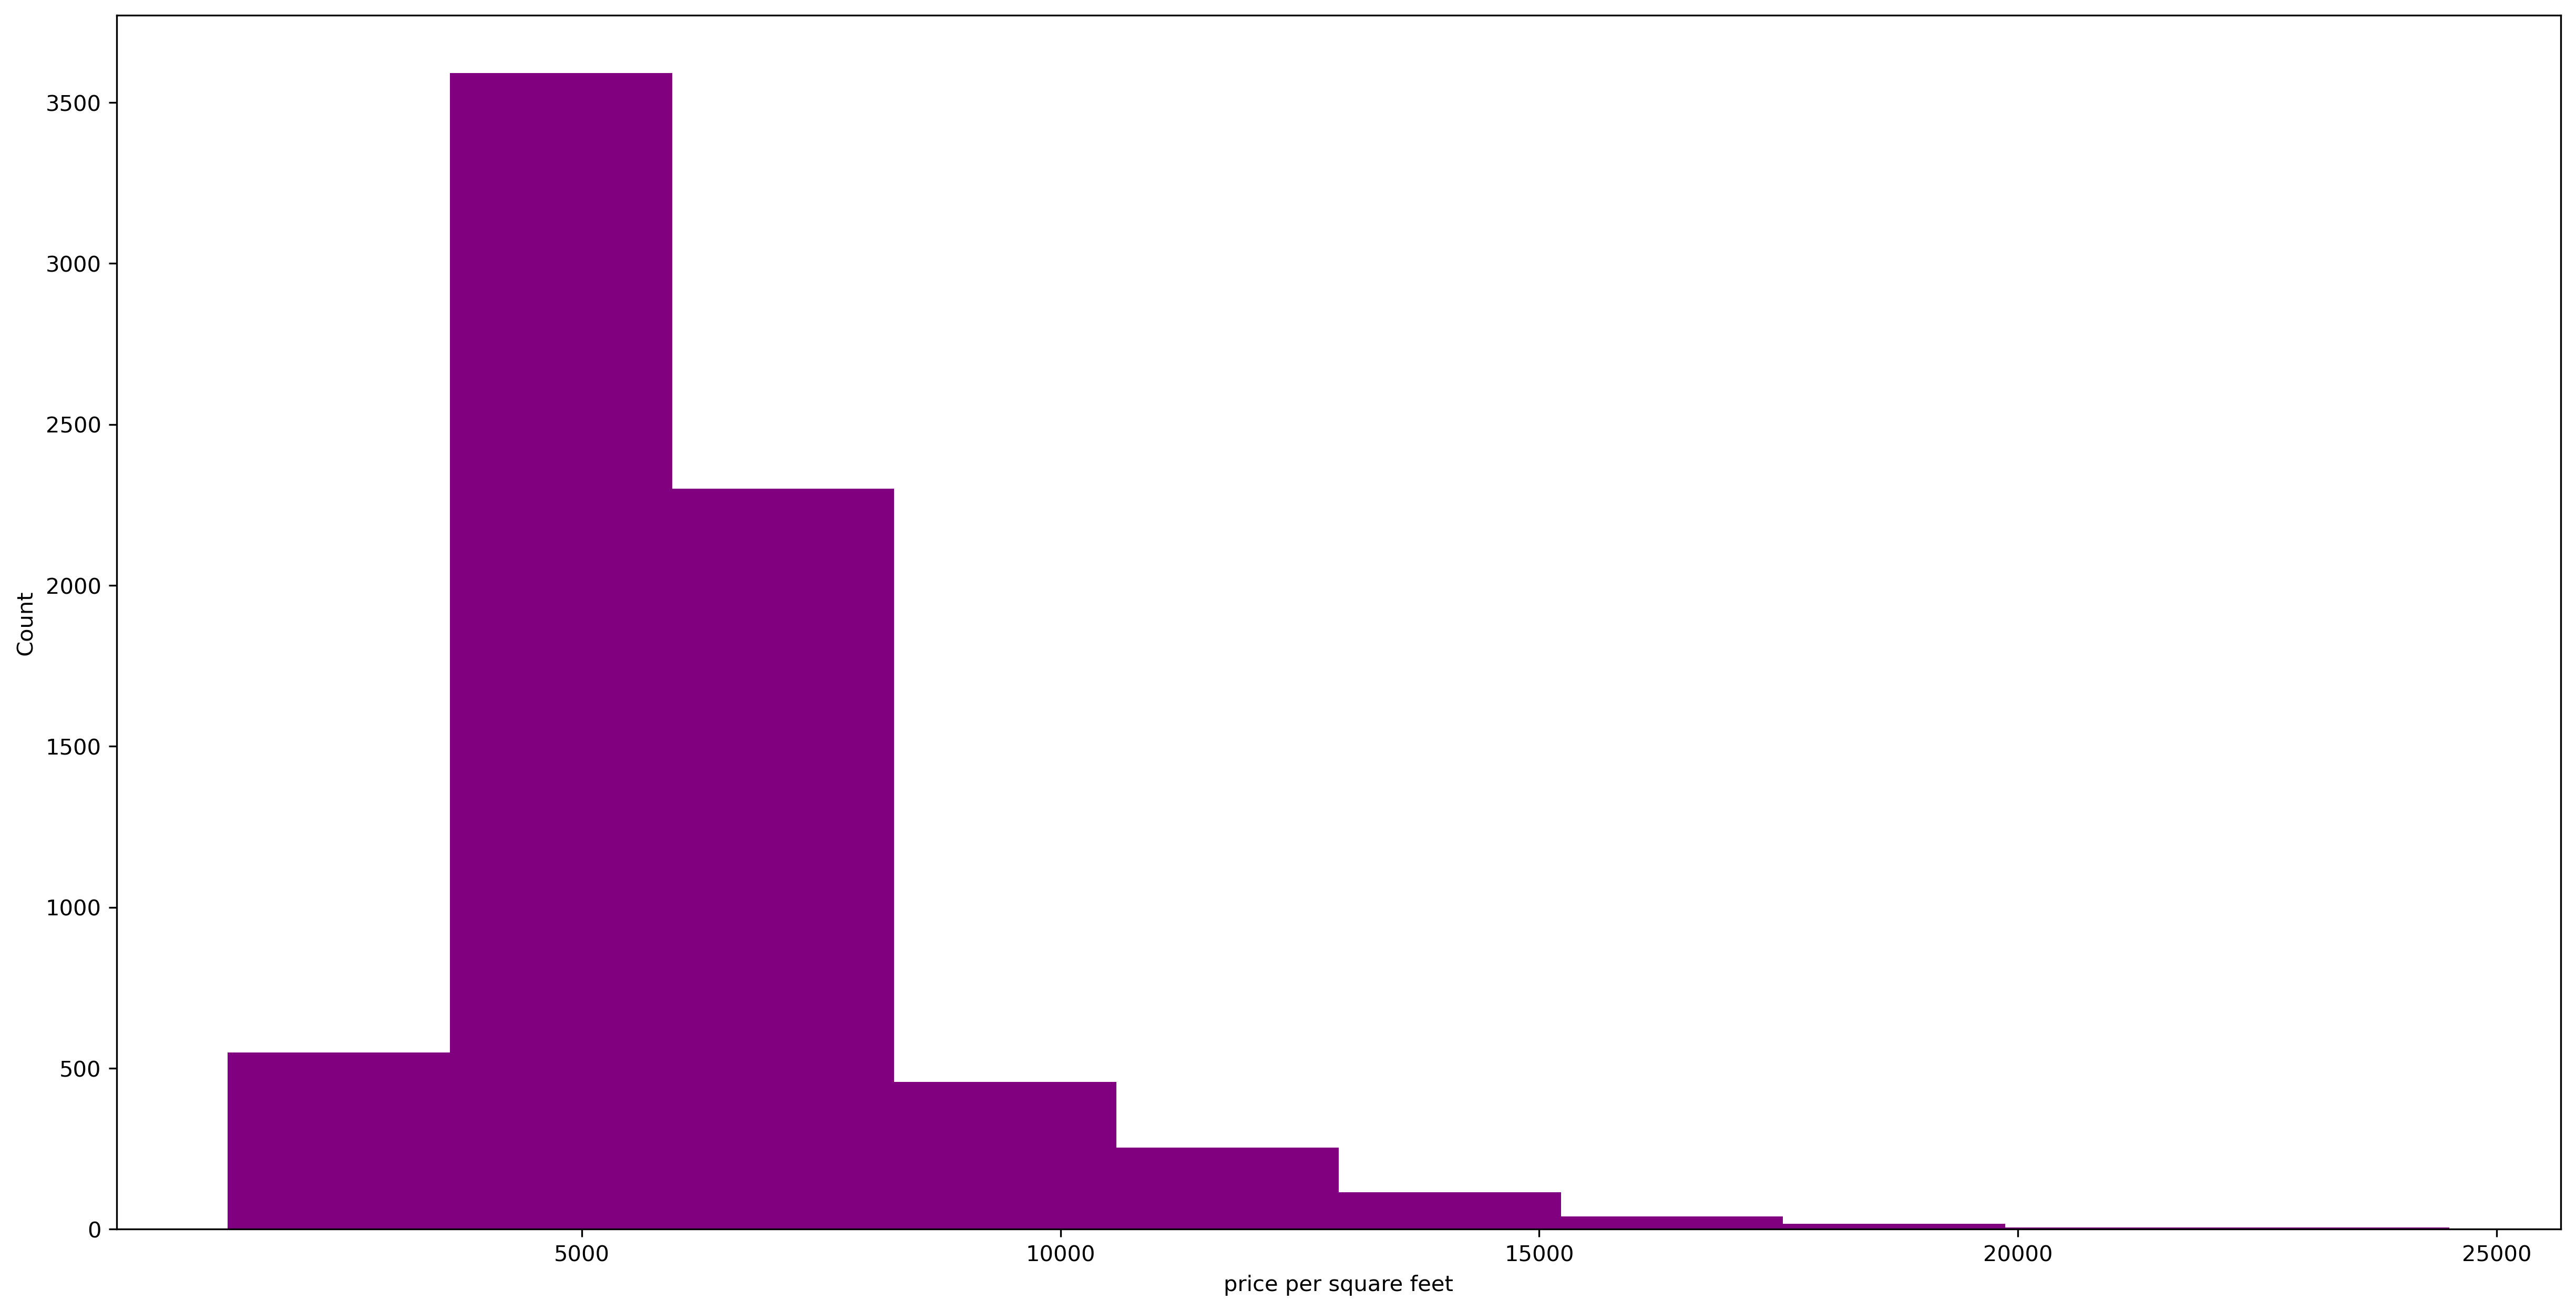

In [64]:
#HISTOGRAM
plt.rcParams['figure.figsize']=(20,10)
plt.hist(df7['price_per_sqft'],color='purple')
plt.xlabel("price per square feet")
plt.ylabel("Count")

In [65]:
#Majority of datapoints lies in 0 to 10000 price per sqft

In [66]:
#NOW REMOVING OUTLIERS IN BATH (BATHROOM)
print(df7['bath'].unique())
print(df7['bath'].nunique())

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]
12


Text(0, 0.5, 'Count')

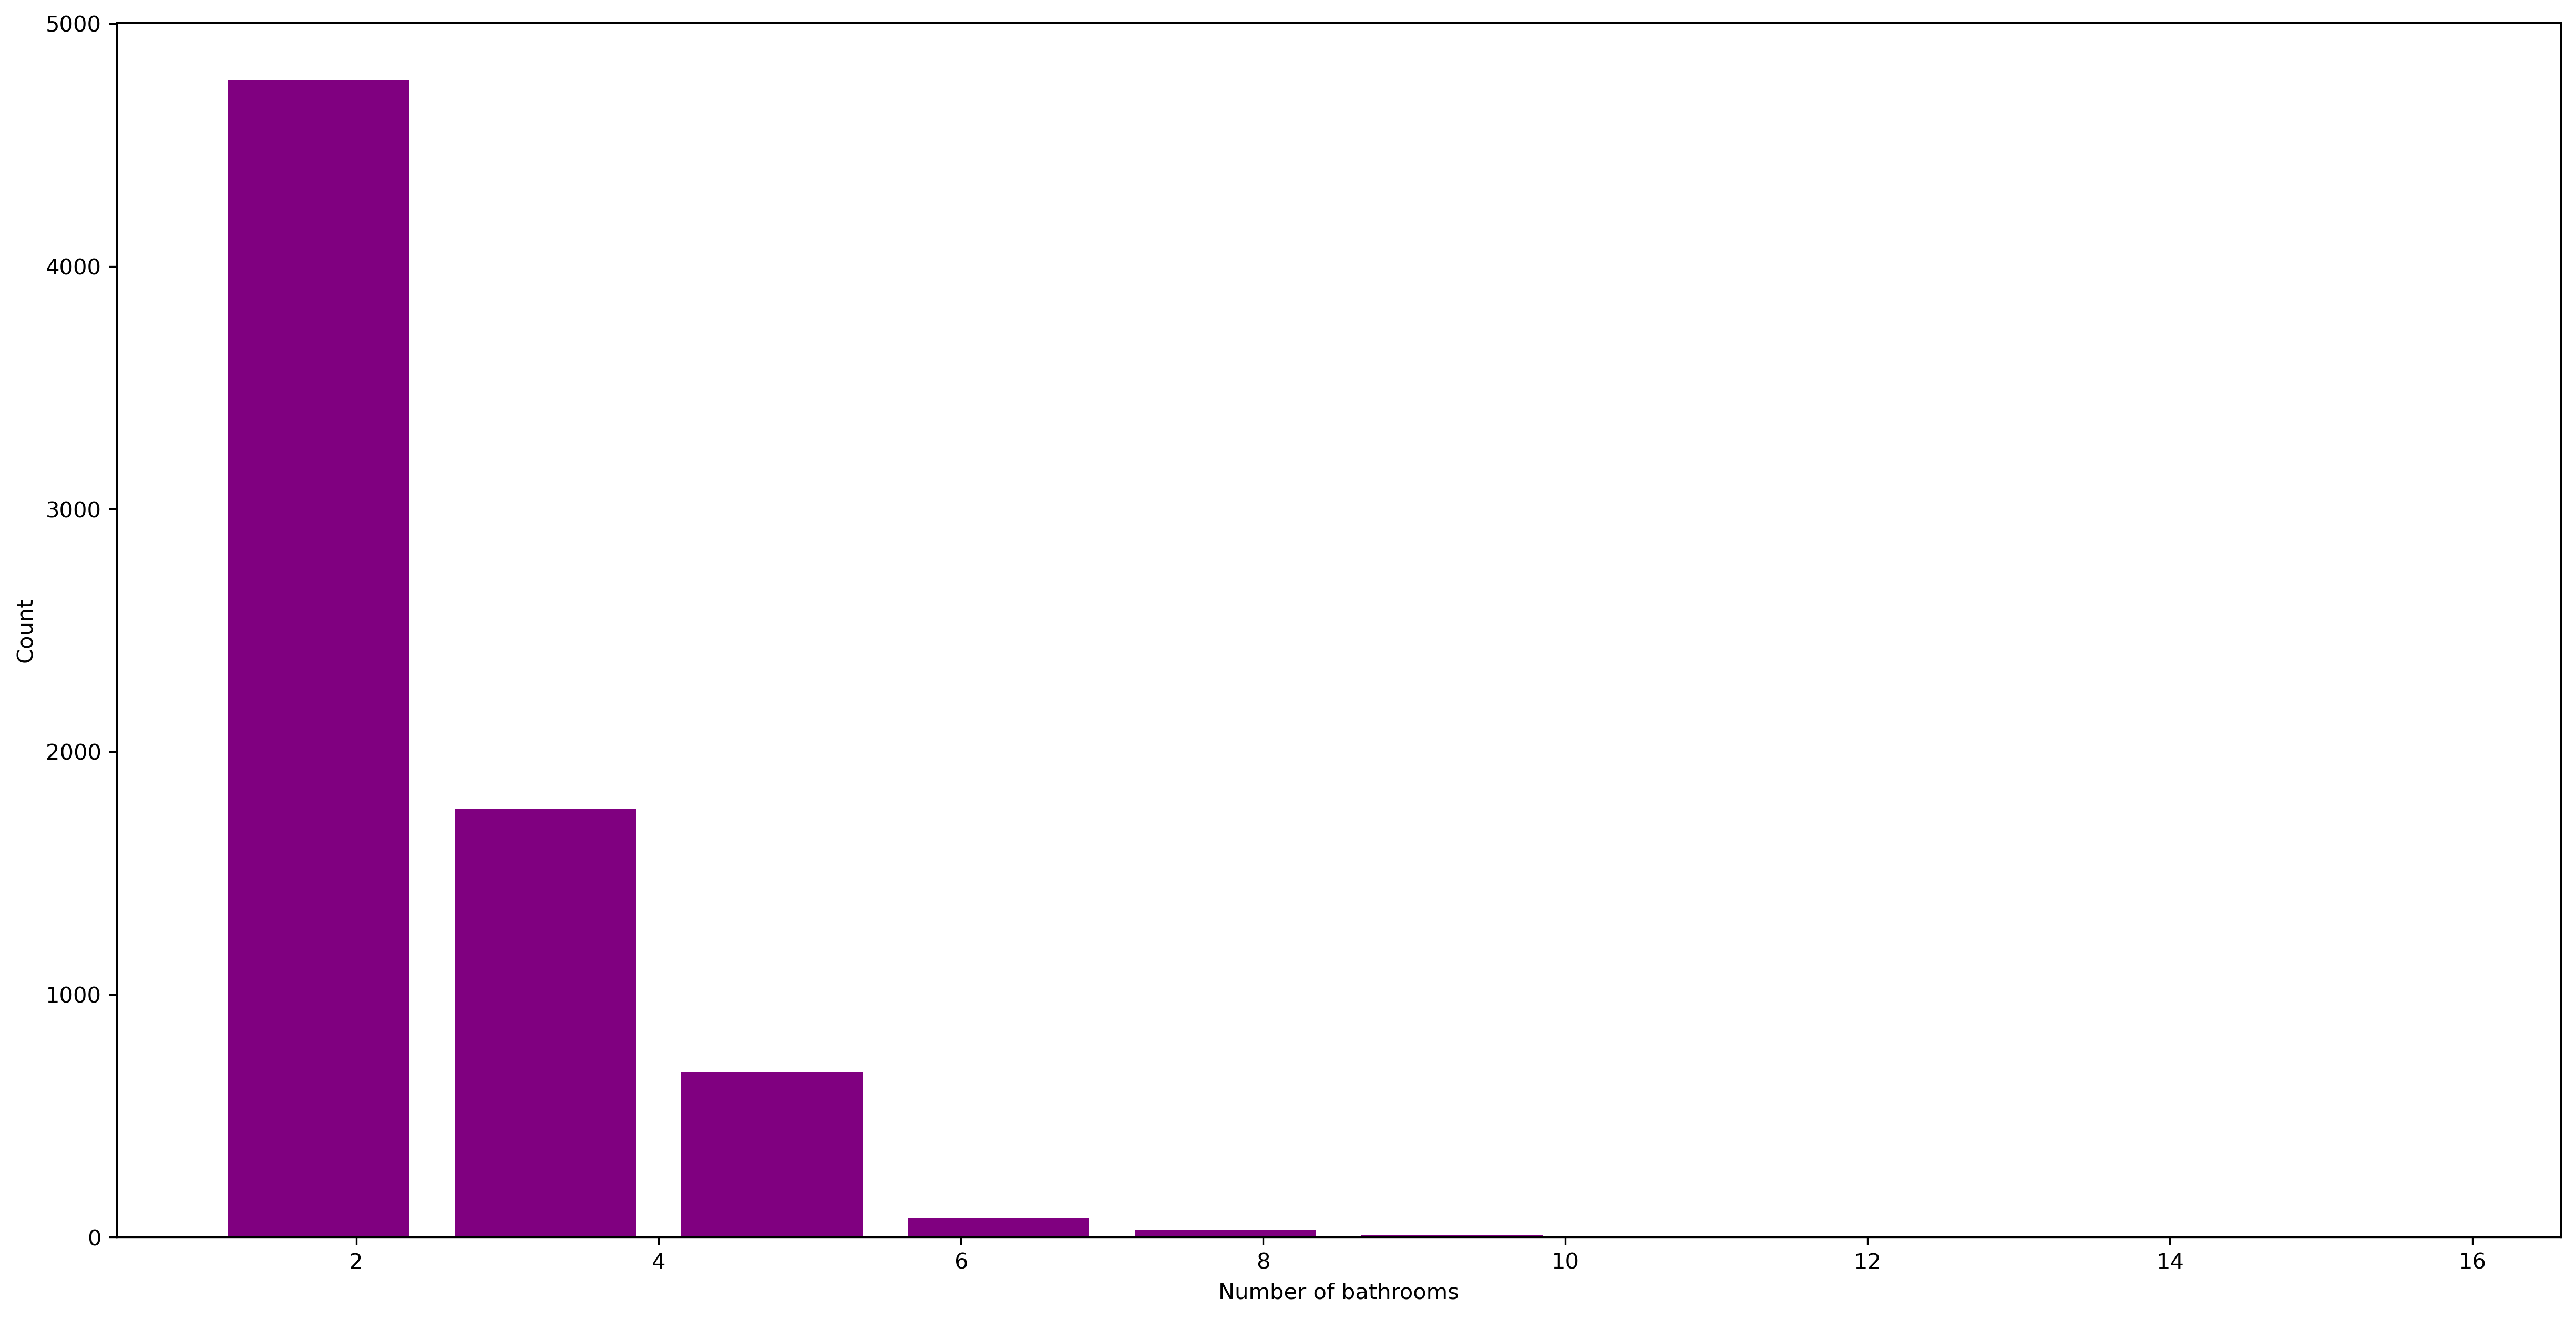

In [67]:
plt.hist(df7['bath'],rwidth=0.8,color='purple')
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [68]:
df7[df7['bath']>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

In [69]:
#Using domain knowledge: (if their's any specific criteria for removing bathroom's outliers )
#SO, anytime when you have no. of bathrooms > than no. of bedrooms,hall +kitchen then remove

Text(0, 0.5, 'Count')

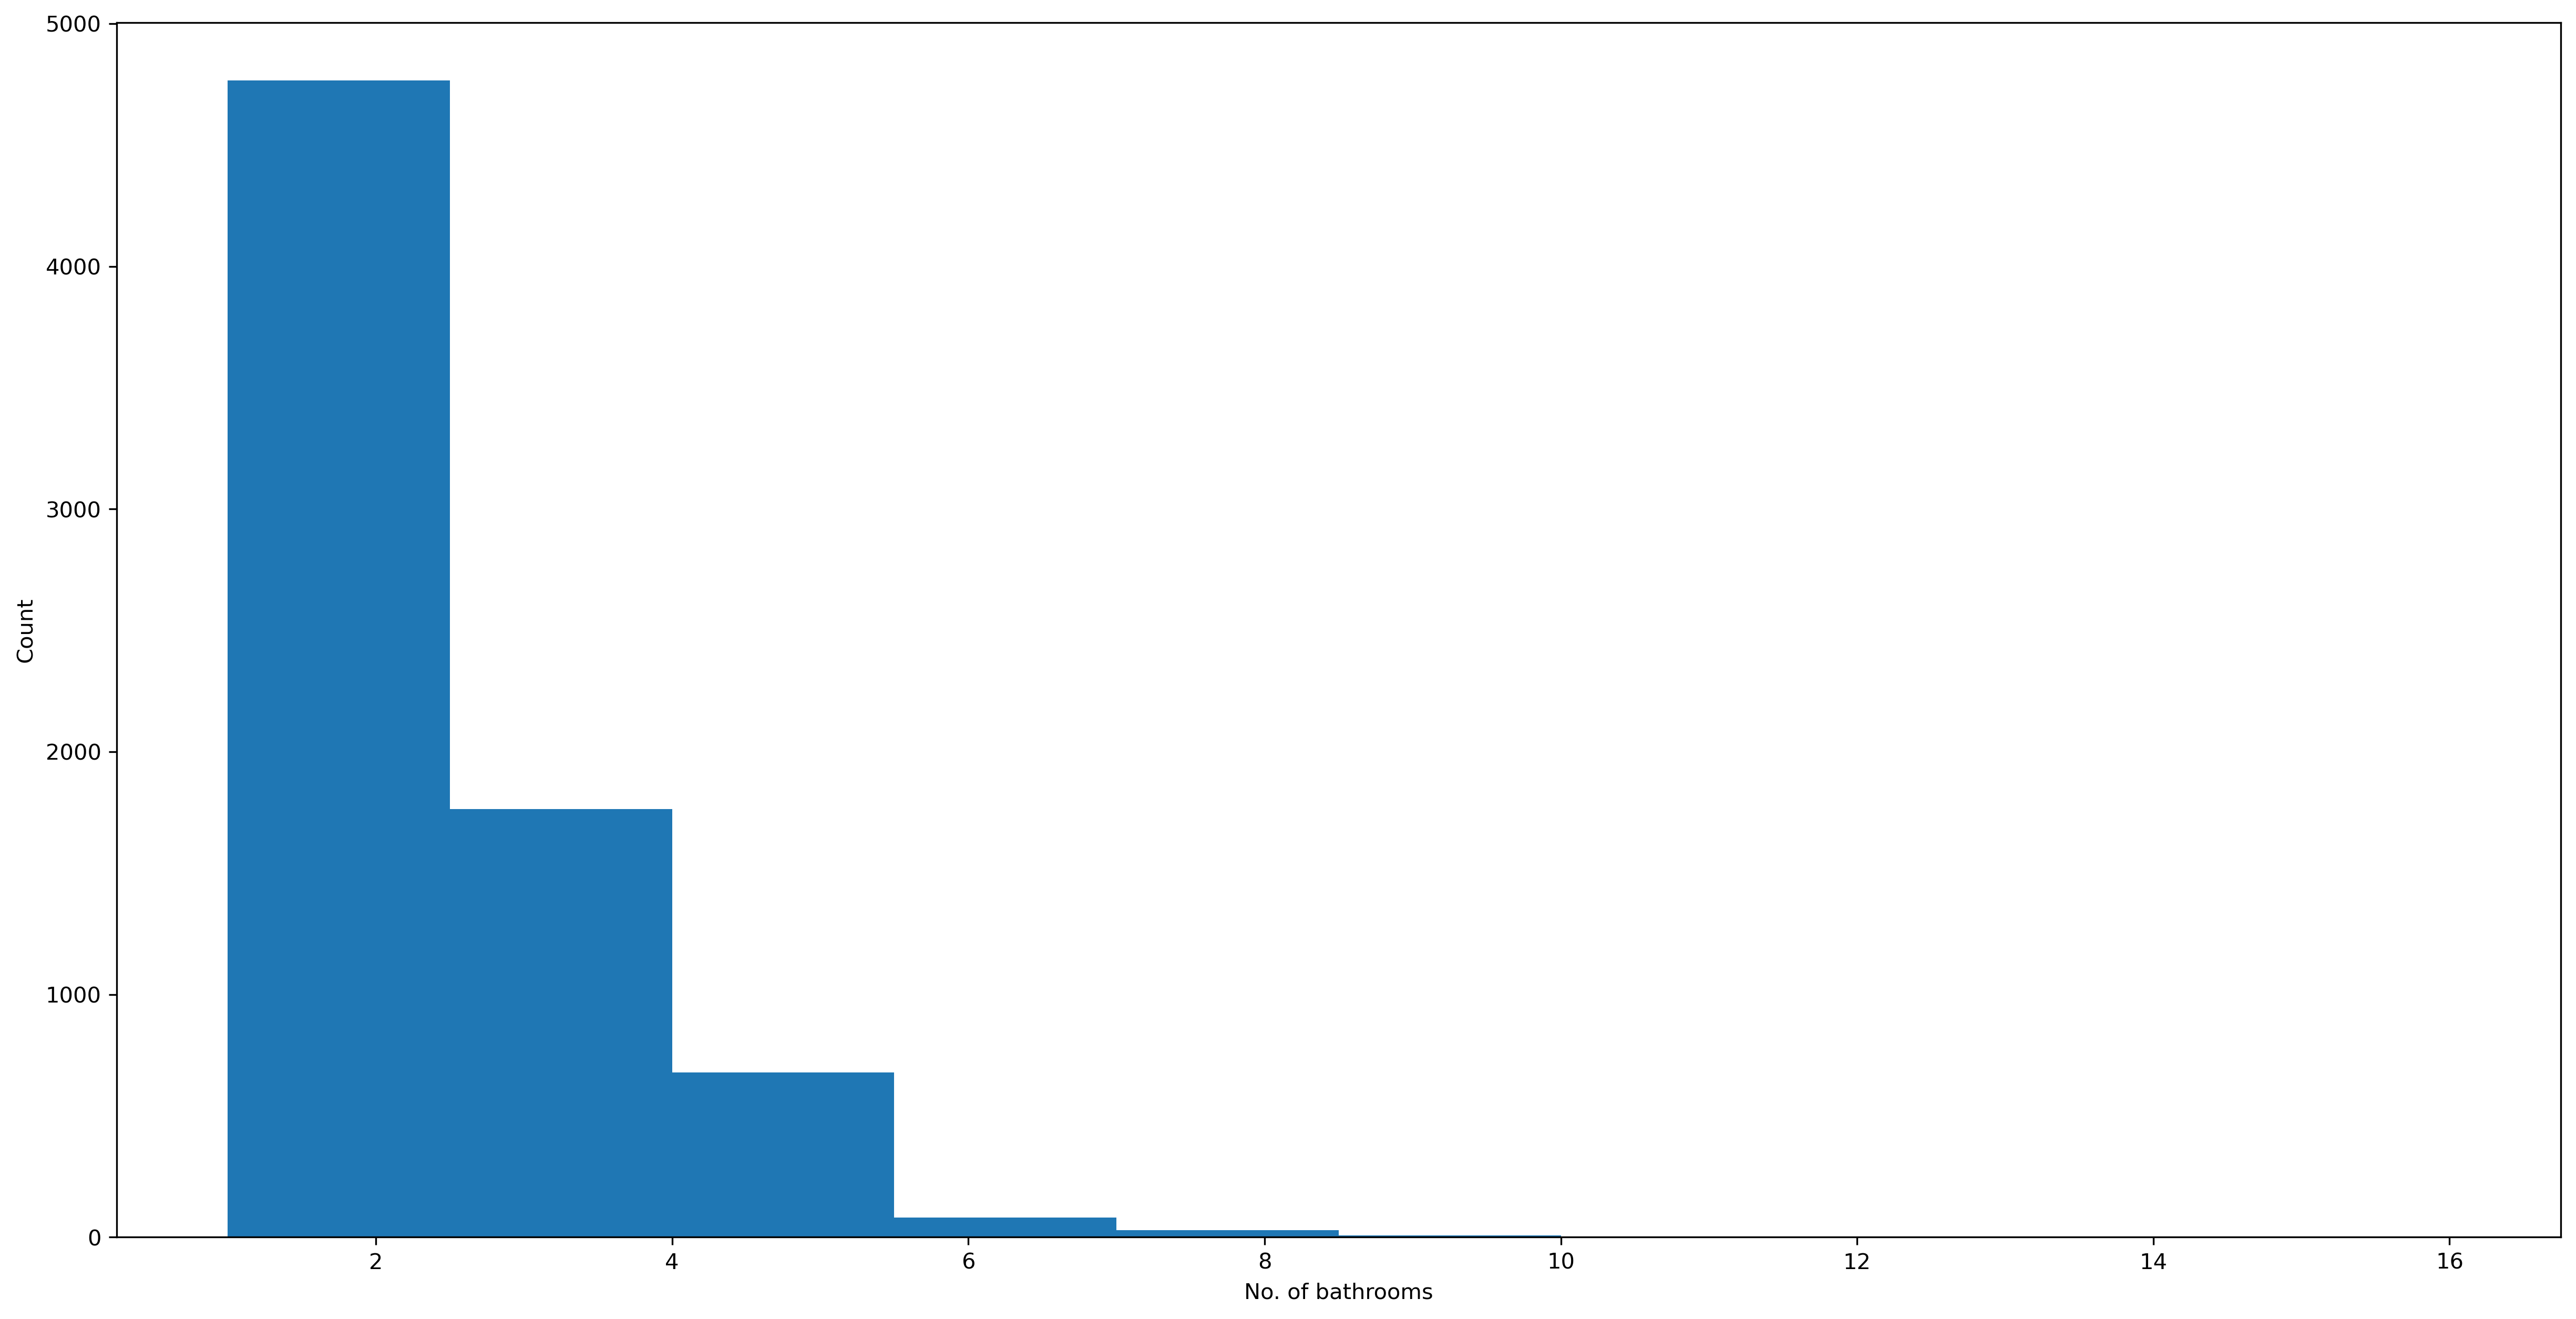

In [70]:
plt.hist(df7['bath'])
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")

In [71]:
#Marking : If No. of bathroom > no. of bedroom +hall, kitchen = as OUTLIERS

In [72]:
df7[df7['bath']>df7['bhk']+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [73]:
#Above dataframe shows the outliers where 4 bhk having 8 bathrooms and so on.

In [74]:
#Remove outliers
#Storing the data with no outliers in another variable
df8=df7[df7['bath']<df7['bhk']+2]
df8.shape
#dataframe df9 storing having less than bathroom = bedroom+2

(7251, 7)

In [75]:
#Dropping uncessary columns 

df9=df8.drop(['size','price_per_sqft'],axis='columns')    #as price_per_sqft was just for outlier detection 

In [76]:
df9.shape

(7251, 5)

In [77]:
df9.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

# Encoding

In [78]:
#ONE HOT ENCODING

In [79]:
dummies=pd.get_dummies(df9['location'])
dummies

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                        1                   0                          0   
1                        1                   0                          0   
2                        1                   0                          0   
3                        1                   0                          0   
4                        1                   0                          0   
5                        1                   0                          0   
6                        1                   0                          0   
8                        0                   1                          0   
9                        0                   1                          0   
10                       0                   1                          0   
12                       0                   1                          0   
13                       0                   1                          0   
14                       0                   1                          0   
15                       0                   1                          0   
16                       0                   1                          0   
17                       0                   1                          0   
18                       0                   1                          0   
19                       0                   1                          0   
20                       0                   1                          0   
21                       0                   1                          0   
22                       0                   1                          0   
24                       0                   1                          0   
26                       0                   1                          0   
27                       0                   0                          1   
28                       0                   0                          1   
29                       0                   0                          1   
30                       0                   0                          1   
31                       0                   0                          1   
32                       0                   0                          1   
33                       0                   0                          1   
34                       0                   0                          1   
35                       0                   0                          0   
38                       0                   0                          0   
39                       0                   0                          0   
40                       0                   0                          0   
41                       0                   0                          0   
42                       0                   0                          0   
43                       0                   0                          0   
44                       0                   0                          0   
45                       0                   0                          0   
46                       0                   0                          0   
47                       0                   0                          0   
48                       0                   0                          0   
49                       0                   0                          0   
50                       0                   0                          0   
51                       0                   0                          0   
52                       0                   0                          0   
53                       0                   0                          0   
55                       0                   0                          0   
56                       0                   0                          0   
57                       0                   0                          0   
58 

In [80]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')   #drop one col to avoid dummy vairable trap

In [81]:
df10.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

In [82]:
df11=df10.drop('location',axis='columns')
df11.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4      1235.0   2.0  148.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

# MODEL BUILDING

In [83]:
#STEP1: define x and y 
X=df11.drop('price',axis='columns')
X.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   
3      1200.0   2.0    3                    1                   0   
4      1235.0   2.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 244 columns]

In [84]:
y = df11['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [85]:
# STEP 2: Standardization (Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [86]:
#STEP3 : Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [87]:
#STEP4 : Model building
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)

#STEP 5 : Evaluation
print("Linear Regression Score:", lr_clf.score(X_test, y_test))

Linear Regression Score: 0.8452277697873783


In [88]:
# STEP 6: Cross-validation using ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)   #ramdomize the sample so each fold have equal distribution
cv_scores = cross_val_score(LinearRegression(), X_scaled, y, cv=cv)
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.82430186 0.77166234 0.85089567 0.80837764 0.83653286]


In [89]:
# STEP 7: Function to find the best model using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model(X, y):
    algo = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False], 'positive': [True, False]}
        },
        'lasso': {
            'model': Lasso(),
            'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], 
                       'splitter': ['best', 'random']}
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algo.items():
        gsc = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gsc.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gsc.best_score_,
            'best_params': gsc.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# STEP 8: Call the function with standardized data
best_models = find_best_model(X_scaled, y)
print(best_models)

               model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.788753   
2      decision_tree    0.741328   

                                         best_params  
0         {'fit_intercept': True, 'positive': False}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'ra...  


In [90]:
#LinearRegression gives the best score.

In [91]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [94]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0]

    x = np.zeros(len(X.columns))  # Initialize array with zeros
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if len(loc_index) > 0:  # Check if location exists in features
        x[loc_index[0]] = 1

    x_scaled = scaler.transform([x])  # Standardize the input features
    return lr_clf.predict(x_scaled)[0]  # Predict using trained model

In [95]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904676961671

In [97]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519394986987

In [96]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484010753

In [98]:
predict_price('Indira Nagar',1000, 2, 3)

179.50527707581847

In [99]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [100]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [101]:
import os
print(os.getcwd())  # This will show where the file is saved

C:\Users\darsh
